In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
#Loading CSV file to Pandas
data = pd.read_csv('phpgNaXZe.csv')
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [3]:
#Create appropriate attribute names
column = ['SBP','Tobacco','LDL','Adiposity','FamHist','Type','Obesity','Alcohol','Age','CHD']
data.columns=column
data.head()

,SBP,Tobacco,LDL,Adiposity,FamHist,Type,Obesity,Alcohol,Age,CHD
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [4]:
#Check for Null Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SBP        462 non-null    int64  
 1   Tobacco    462 non-null    float64
 2   LDL        462 non-null    float64
 3   Adiposity  462 non-null    float64
 4   FamHist    462 non-null    int64  
 5   Type       462 non-null    int64  
 6   Obesity    462 non-null    float64
 7   Alcohol    462 non-null    float64
 8   Age        462 non-null    int64  
 9   CHD        462 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 36.2 KB


In [5]:
#View the statistics of the data
data.describe()

,SBP,Tobacco,LDL,Adiposity,FamHist,Type,Obesity,Alcohol,Age,CHD
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,1.584416,53.103896,26.044113,17.044394,42.816017,1.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,1.000000,13.000000,14.700000,0.000000,15.000000,1.000000
25%,124.000000,0.052500,3.282500,19.775000,1.000000,47.000000,22.985000,0.510000,31.000000,1.000000
50%,134.000000,2.000000,4.340000,26.115000,2.000000,53.000000,25.805000,7.510000,45.000000,1.000000
75%,148.000000,5.500000,5.790000,31.227500,2.000000,60.000000,28.497500,23.892500,55.000000,2.000000
max,218.000000,31.200000,15.330000,42.490000,2.000000,78.000000,46.580000,147.190000,64.000000,2.000000


<AxesSubplot:>

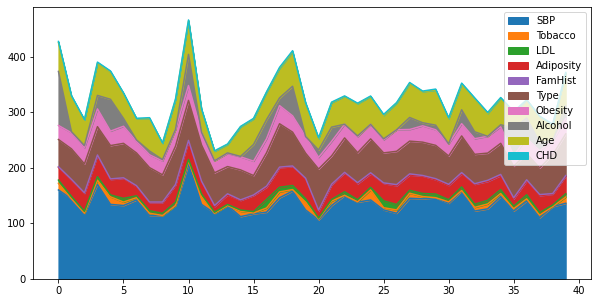

In [6]:
# Visualise the data in a graph
data.head(40).plot(kind='area',figsize=(10,5))

In [7]:
#Scaling the data to make it more legible.
encoder = LabelEncoder()
data['FamHist']=encoder.fit_transform(data['FamHist'])
data['CHD']=encoder.fit_transform(data['CHD'])

scale = MinMaxScaler(feature_range =(0,100))
data['SBP'] = scale.fit_transform(data['SBP'].values.reshape(-1,1))

data.head(5)

,SBP,Tobacco,LDL,Adiposity,FamHist,Type,Obesity,Alcohol,Age,CHD
0,50.427350,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,36.752137,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,14.529915,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,58.974359,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,28.205128,13.60,3.50,27.78,0,60,25.99,57.34,49,1


<AxesSubplot:>

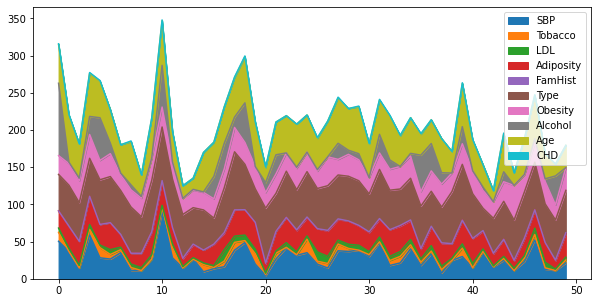

In [8]:
#Re-visualising the scaled data
data.head(50).plot(kind='area',figsize=(10,5))

In [9]:
#Splitting the data
X = data.iloc[:,:9].values
y = data["CHD"].values

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42 )

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## K-Nearest Neighbour

In [11]:
knn_clf = KNeighborsClassifier(n_neighbors =5,n_jobs = -1,leaf_size = 60,algorithm='brute')
knn_clf.fit(X_train,y_train)


KNeighborsClassifier(algorithm='brute', leaf_size=60, n_jobs=-1)

In [12]:
y_pred_knn = knn_clf.predict(X_test)
y_pred_knn

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0])

In [13]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[53,  6],
       [22, 12]])

In [14]:
knn_result = accuracy_score(y_test,y_pred_knn)
knn_result

0.6989247311827957

## ANN

In [15]:
ann_clf = MLPClassifier()

parameters = {'solver': ['lbfgs'],
             'alpha':[1e-4],
             'hidden_layer_sizes':(9,14,14,2),  
             'random_state': [42],
             'max_iter':[10000]}

In [16]:
acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(ann_clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

ann_clf = grid_obj.best_estimator_

In [17]:
ann_clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=2, max_iter=10000, random_state=42,
              solver='lbfgs')

In [18]:
y_pred_ann = ann_clf.predict(X_test)

In [19]:
cm_ann = confusion_matrix(y_test, y_pred_ann)
cm_ann


array([[52,  7],
       [13, 21]])

In [20]:
ann_result = accuracy_score(y_test,y_pred_ann)
ann_result

0.7849462365591398